# 3. Logistic Regression Problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.optimize import minimize

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 14

### 1. Inspect and plot some portion of the training data using pandas. Segregate the training and testing data into two separate variables consisting of ‘feature values’ and corresponding ‘predictions’ (the prediction column is titled ‘RainTomorrow’ in the dataset). To simplify the problem a bit, clean the whole data by carrying out the following sub-tasks:

In [4]:
train_weather = pd.read_csv("data/weather_train.csv")
test_weather = pd.read_csv("data/weather_test.csv")
train_weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


#### (a) Convert the predictions in the binary format by using ‘1’ for ‘YES’ and ‘0’ for ‘NO’.

In [5]:
train_weather = train_weather.replace({"RainTomorrow":{"Yes":1, "No":0}})
train_weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0


- converting the same for the test data as well

In [6]:
test_weather = test_weather.replace({"RainTomorrow":{"Yes":1 , "No":0}})
test_weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,11-01-2014,PearceRAAF,19.0,44.5,0.0,NaN,13.1,E,54.0,E,...,27.0,10.0,1015.3,1009.7,NaN,NaN,31.2,42.9,No,0.0
1,12-01-2014,PearceRAAF,31.2,44.3,0.0,NaN,12.2,E,54.0,N,...,10.0,22.0,1007.7,1007.8,NaN,NaN,40.2,35.8,No,0.0
2,13-01-2014,PearceRAAF,19.3,30.3,0.0,NaN,9.4,WSW,46.0,SSW,...,63.0,43.0,1010.9,1009.5,7.0,2.0,23.2,27.6,No,0.0
3,14-01-2014,PearceRAAF,14.0,29.7,0.0,NaN,13.1,WSW,44.0,SSE,...,43.0,29.0,1012.2,1009.5,0.0,0.0,23.0,29.0,No,0.0
4,15-01-2014,PearceRAAF,12.7,27.9,0.0,NaN,12.4,W,50.0,NW,...,48.0,34.0,1008.4,1008.4,1.0,3.0,23.4,25.7,No,0.0


#### (b) Identify and drop the feature columns having datatype ‘object’.

- Columns having object datatype are

In [7]:
obj_dtype_columns = train_weather.select_dtypes(include=['object']).columns
obj_dtype_columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday'],
      dtype='object')

- Dropping them from both train and test data

In [8]:
train_weather = train_weather.drop(columns=obj_dtype_columns, axis=1)
train_weather.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0


In [9]:
test_weather = test_weather.drop(columns=obj_dtype_columns, axis=1)
test_weather.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,19.0,44.5,0.0,NaN,13.1,54.0,26.0,15.0,27.0,10.0,1015.3,1009.7,NaN,NaN,31.2,42.9,0.0
1,31.2,44.3,0.0,NaN,12.2,54.0,31.0,30.0,10.0,22.0,1007.7,1007.8,NaN,NaN,40.2,35.8,0.0
2,19.3,30.3,0.0,NaN,9.4,46.0,22.0,28.0,63.0,43.0,1010.9,1009.5,7.0,2.0,23.2,27.6,0.0
3,14.0,29.7,0.0,NaN,13.1,44.0,17.0,30.0,43.0,29.0,1012.2,1009.5,0.0,0.0,23.0,29.0,0.0
4,12.7,27.9,0.0,NaN,12.4,50.0,11.0,31.0,48.0,34.0,1008.4,1008.4,1.0,3.0,23.4,25.7,0.0


- Checking the columns of train data and test data after dropping the object datatype columns 

In [10]:
assert train_weather.columns.all() == test_weather.columns.all()

#### (c) Identify cells having ‘NaN’ or ‘NA’ values and replace them with mean values of their respective columns.

- Training data NaN or NA values

In [11]:
train_weather.isna().sum()

MinTemp            524
MaxTemp            390
Rainfall          1296
Evaporation      28015
Sunshine         33621
WindGustSpeed     5522
WindSpeed9am      1132
WindSpeed3pm      1756
Humidity9am        790
Humidity3pm       1395
Pressure9am       6995
Pressure3pm       6945
Cloud9am         22448
Cloud3pm         22886
Temp9am            509
Temp3pm           1156
RainTomorrow         0
dtype: int64

- Test data NaN or NA values

In [12]:
test_weather.isna().sum()

MinTemp            171
MaxTemp            139
Rainfall           404
Evaporation      12117
Sunshine         12752
WindGustSpeed      476
WindSpeed9am       155
WindSpeed3pm       161
Humidity9am        230
Humidity3pm        983
Pressure9am       4203
Pressure3pm       4204
Cloud9am         11637
Cloud3pm         12308
Temp9am            132
Temp3pm            815
RainTomorrow       408
dtype: int64

- Filling the NaN or NA values with their respective mean values in both train and test data using fillna() function

In [13]:
train_weather = train_weather.fillna(train_weather.mean())
train_weather.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,0.6,5.52876,7.568706,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.00000,4.487216,16.9,21.8,0
1,7.4,25.1,0.0,5.52876,7.568706,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.43216,4.487216,17.2,24.3,0
2,12.9,25.7,0.0,5.52876,7.568706,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.43216,2.000000,21.0,23.2,0
3,9.2,28.0,0.0,5.52876,7.568706,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.43216,4.487216,18.1,26.5,0
4,17.5,32.3,1.0,5.52876,7.568706,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.00000,8.000000,17.8,29.7,0


In [14]:
test_weather = test_weather.fillna(test_weather.mean())
test_weather.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,19.0,44.5,0.0,6.096236,13.1,54.0,26.0,15.0,27.0,10.0,1015.3,1009.7,3.780706,3.935895,31.2,42.9,0.0
1,31.2,44.3,0.0,6.096236,12.2,54.0,31.0,30.0,10.0,22.0,1007.7,1007.8,3.780706,3.935895,40.2,35.8,0.0
2,19.3,30.3,0.0,6.096236,9.4,46.0,22.0,28.0,63.0,43.0,1010.9,1009.5,7.000000,2.000000,23.2,27.6,0.0
3,14.0,29.7,0.0,6.096236,13.1,44.0,17.0,30.0,43.0,29.0,1012.2,1009.5,0.000000,0.000000,23.0,29.0,0.0
4,12.7,27.9,0.0,6.096236,12.4,50.0,11.0,31.0,48.0,34.0,1008.4,1008.4,1.000000,3.000000,23.4,25.7,0.0


- After filling the NaN or NA values in train data

In [15]:
train_weather.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainTomorrow     0
dtype: int64

- After filling the NaN or NA values in test data

In [16]:
test_weather.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainTomorrow     0
dtype: int64

#### (d) Normalize all the feature values by scaling them between 0 and 1. The values in feature matrix ‘X’ can be normalized as:

- Normalizing the train and test data using the formula

$$ X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}} $$



- writing a function to normalize the data between 0 and 1

In [17]:
def normalize(data):
    return (data - data.min()) / (data.max() - data.min())


In [18]:
for col in train_weather.columns:
    if col != "RainTomorrow":
        train_weather[col] = normalize(train_weather[col])
        test_weather[col] = normalize(test_weather[col])

- Print the max and min of each column to make sure they are normalized

In [19]:
for col in train_weather.columns:
    print(col, train_weather[col].max(), train_weather[col].min())


MinTemp 1.0 0.0
MaxTemp 1.0 0.0
Rainfall 1.0 0.0
Evaporation 1.0 0.0
Sunshine 1.0 0.0
WindGustSpeed 1.0 0.0
WindSpeed9am 1.0 0.0
WindSpeed3pm 1.0 0.0
Humidity9am 1.0 0.0
Humidity3pm 1.0 0.0
Pressure9am 1.0 0.0
Pressure3pm 1.0 0.0
Cloud9am 1.0 0.0
Cloud3pm 1.0 0.0
Temp9am 1.0 0.0
Temp3pm 1.0 0.0
RainTomorrow 1 0


- Checking the same for test data

In [20]:
for col in test_weather.columns:
    print(col, test_weather[col].max(), test_weather[col].min())

MinTemp 1.0 0.0
MaxTemp 1.0 0.0
Rainfall 1.0 0.0
Evaporation 1.0 0.0
Sunshine 1.0 0.0
WindGustSpeed 1.0 0.0
WindSpeed9am 1.0 0.0
WindSpeed3pm 1.0 0.0
Humidity9am 1.0 0.0
Humidity3pm 1.0 0.0
Pressure9am 1.0 0.0
Pressure3pm 1.0 0.0
Cloud9am 1.0 0.0
Cloud3pm 1.0 0.0
Temp9am 1.0 0.0
Temp3pm 1.0 0.0
RainTomorrow 1.0 0.0


***

### 2. Classify the cleaned dataset using binary classification algorithm discussed in the class and calculate the optimized weights and training set accuracy for the model (use Truncated Newton’s Method in SciPy for optimization).

- Separating the train data into train_x and train_y and adding a column of ones to train_x for the bias term

In [21]:
X = train_weather.drop(columns="RainTomorrow")
# insert a column of ones to the beginning of the dataframe
X.insert(0, "Ones", 1)
y = train_weather["RainTomorrow"]

- Doing the same for test data

In [22]:

test_X = test_weather.drop(columns="RainTomorrow")
# insert a column of ones to the beginning of the dataframe
test_X.insert(0, "Ones", 1)
test_y = test_weather["RainTomorrow"]

- Defining few important functions for the logistic regression model

In [23]:
# define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# define the cost function which needs to be minimized
def cost_function(weights, X, y):
    m = len(y)
    y_hat =sigmoid(np.dot(X, weights.T))
    cost = np.sum(-y * np.log(y_hat) - (1 - y) * (np.log(1 - y_hat))) / m
    return cost

# define the gradient function
def gradient(weights, X, y):
    m = len(y)
    y_hat = sigmoid(np.dot(X, weights.T))
    grad = np.dot(X.T, (y_hat - y)) / m
    return grad


# initialize the weights randomly
initial_weights = np.random.rand(X.shape[1])

In [24]:
def accuracy(weights, X, y):
    y_hat = sigmoid(np.dot(X, weights.T))
    y_hat = np.where(y_hat >= 0.5, 1, 0)
    return np.sum(y_hat == y) / len(y)

In [25]:
# Define the call back function for storing the cost values and accuracy values 
# during the optimixation of the weights by scipy.optimize.minimize
test_costs = []
train_costs = []
train_acc = []
test_acc = []
def callback(weights):
    train_costs.append(cost_function( weights, X, y))
    test_costs.append(cost_function(weights, test_X, test_y))
    # calculate the training accuracy of the model
    train_accuracy = accuracy(weights, X, y)
    train_acc.append(train_accuracy)

    # calculate the test accuracy of the model
    test_accuracy = accuracy(weights, test_X, test_y)
    test_acc.append(test_accuracy)



- Our objective is to minimize the cost function using Truncated Newton’s Method in SciPy for optimization to get the optimized weights

In [26]:
optimized_result = minimize(
    fun=cost_function, 
    args=(X, y),
    x0=initial_weights,                 
    method='TNC', 
    jac=gradient, 
    callback=callback, 
    tol=1e-10
)

- In Above miniminze function,

1. func: The function to minimize
2. args: Extra arguments to func (here, X, y)
3. x0: The initial guess
4. method: The optimization method to use (here, TNC)
5. jac: The gradient of func to be minimized 
6. callback: A function to call after each iteration of the optimizer
7. tol: Tolerance for termination

- Now checking how well our model has classified the training data

In [27]:
print(f"Training Accuracy:  {train_acc[-1]}")

Training Accuracy:  0.8229034612577312


### 3. Plot the cost history (J) vs. the number of iterations. [Hint: You can make use of ‘callback function’ in Optimize.minimize to store the cost history] 

- Plottiing the cost history vs number of iterations which we stored using callback function

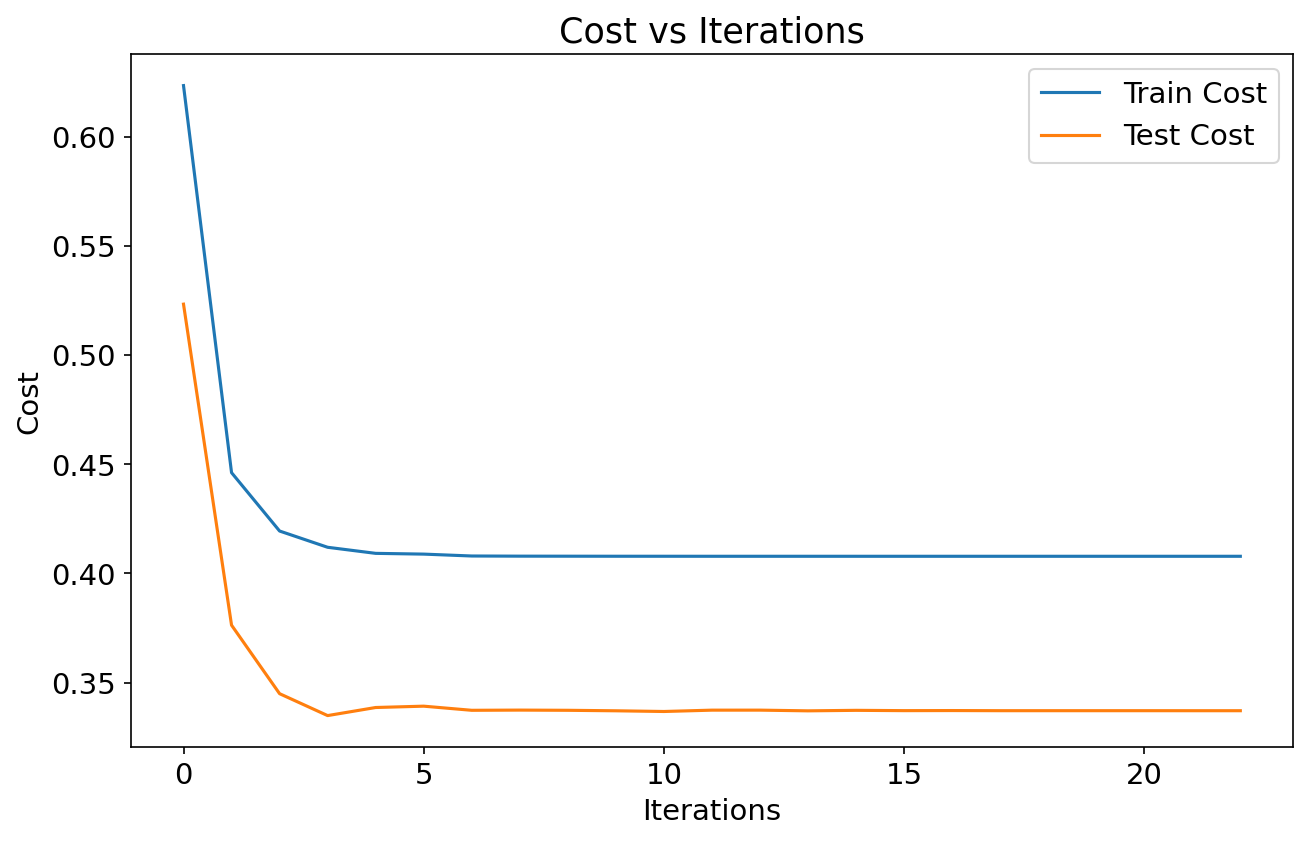

<Figure size 1500x900 with 0 Axes>

In [33]:
plt.plot(train_costs, label="Train Cost")
plt.plot(test_costs, label="Test Cost")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.legend()
plt.show()
plt.savefig("figures/0301.png")

- So we can see that after almost 5 iterations the cost function is saturated for both training and test data
- We have less cost function's value for training data than test data, this means that our model is not overfitting the training data

### 4. Apply the trained model on the cleaned test dataset to predict the testing accuracy of the model. 

- Our final trained model's weights are 

In [29]:
print(f"Optimized Weights: \n{optimized_result.x}")

Optimized Weights: 
[-5.56091565 -0.68163258  0.98935906  7.15951989  1.76727    -1.59531726
  5.82946795  1.05602533 -2.37416041  1.14897026  5.24367598  5.36088763
 -6.71702547  0.23611077  1.01613355  0.08795045  0.47198652]


- Using the above weights we can predict the test data

In [30]:
print(f"Test Accuracy:  {test_acc[-1]}")

Test Accuracy:  0.8472141064860963


- The Above accuracy on test data is more than the accuracy on training data, this means that our model is not overfitting the training data

- We can also see the improvement in the accuracy at each iteration

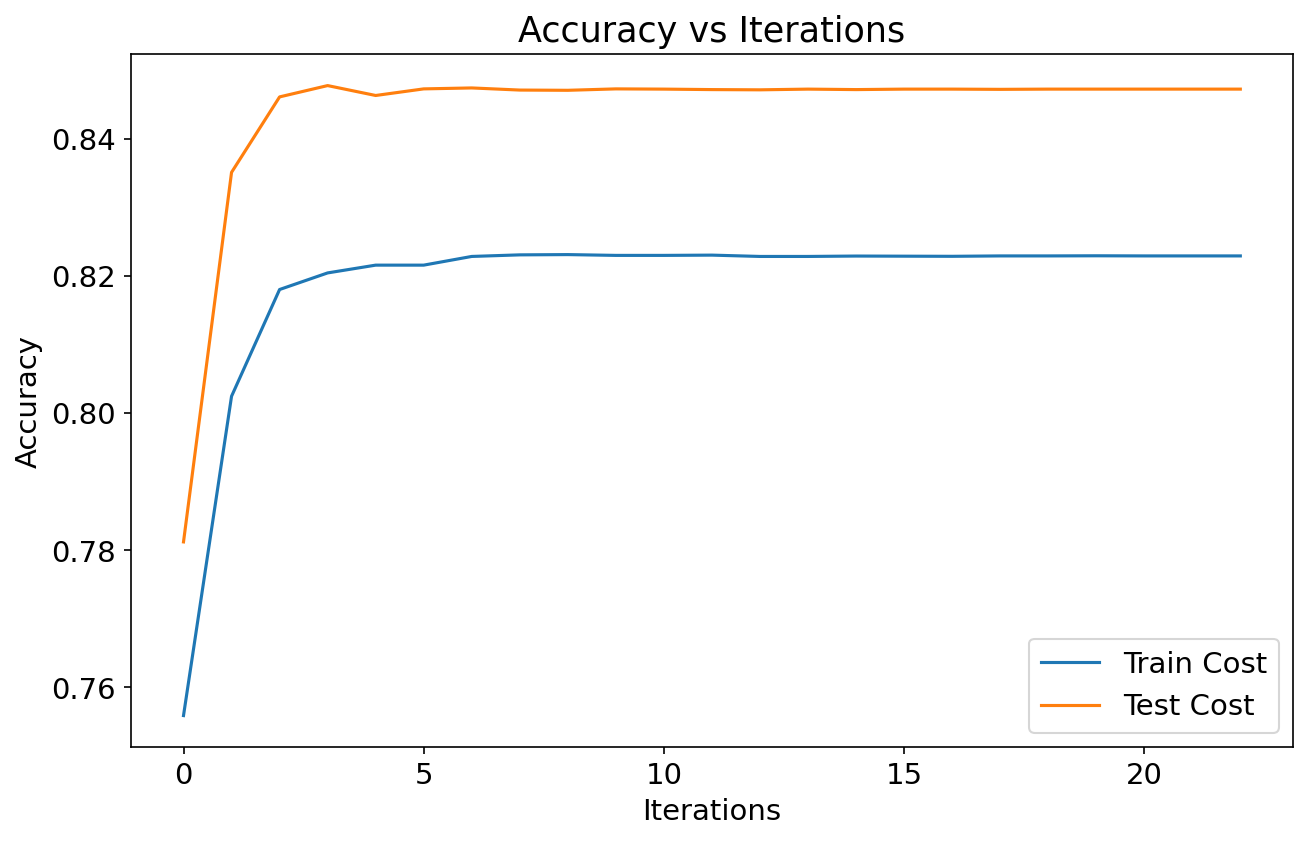

<Figure size 1500x900 with 0 Axes>

In [34]:
plt.plot(train_acc, label="Train Cost")
plt.plot(test_acc, label="Test Cost")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Iterations")
plt.legend()
plt.show()
plt.savefig("figures/0302.png")

***
***